In [13]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

results=loadmat('yalefaces.mat')
X=results['X']
print(X.shape)

(1024, 2414)


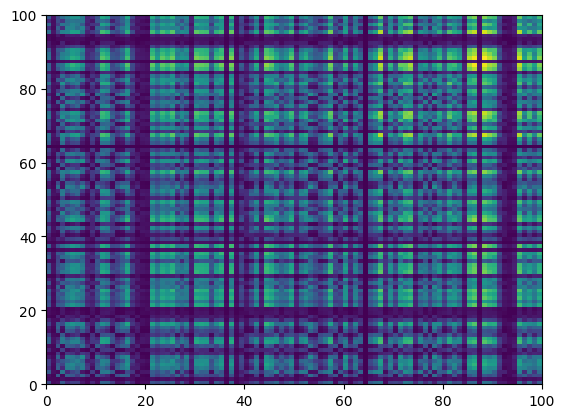

In [14]:
m=100 #specifies the number of columns to include in the subset of 'X' used to compute the covariance matrix 
Xm=X[:, 0:100] # extracts the first 100 columns of the input matrix 'X' and stores them in a new matrix 'Xm'

C=np.matmul(Xm.T,Xm)#computes the covariance matrix of 'Xm' by taking the dot product of its transpose with itself 
# resulting matrix 'C' has dimensions 100 x 100

#print(Xm.shape) #dimensions of matrix Xm, 1024 x 100
#print(C.shape) #dimensions of covariance matrix 
#print(C) #values of covariance matrix as a numpy array
plt.pcolor(C) #creates covariance matrix, with darker colors indicating
# higher correlation and lighter colors indicating lower correlations

86
88


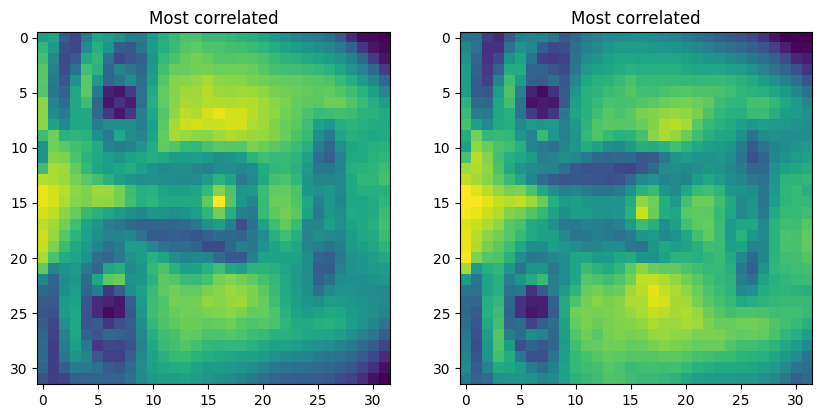

In [15]:
score_max=0
for j in range(99):
    for jj in range((j+1),100):
        if ( C[j,jj]>score_max ):
            score_max=C[j,jj]
            r_max=j
            c_max=jj
            
print(r_max)
print(c_max)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_max].reshape((32, 32)).T)
axes[0].set_title('Most correlated')
axes[1].imshow(X[:, c_max].reshape((32, 32)).T)
axes[1].set_title('Most correlated')
plt.show()

54
64


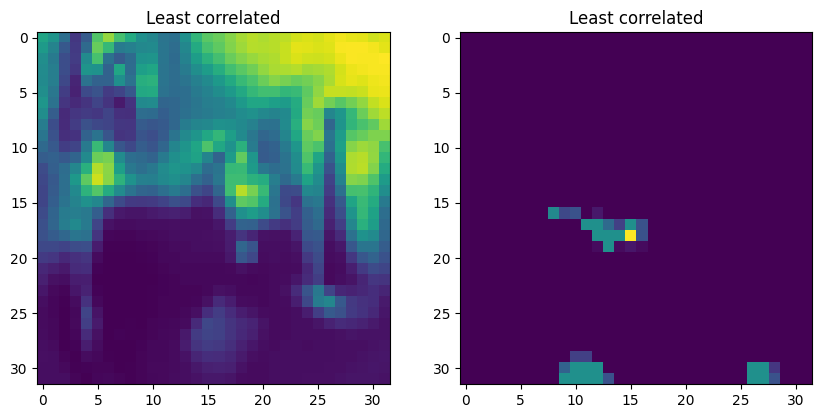

In [16]:
score_min = np.inf
for j in range(99):
    for jj in range((j+1), 100):
        if C[j, jj] < score_min:
            score_min = C[j, jj]
            r_min = j
            c_min = jj
            
print(r_min)
print(c_min)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_min].reshape((32, 32)).T)
axes[0].set_title('Least correlated')
axes[1].imshow(X[:, c_min].reshape((32, 32)).T)
axes[1].set_title('Least correlated')
plt.show()

(c) Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the
correlation matrix between them.

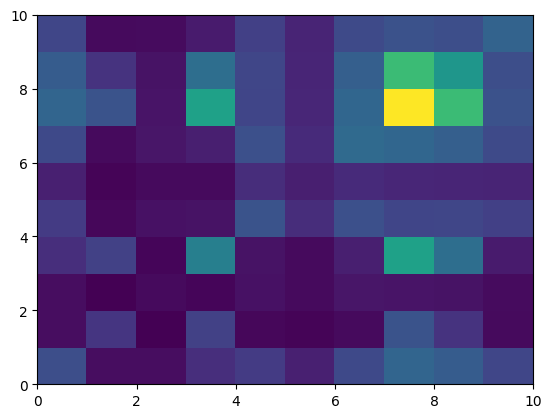

In [10]:
m=10
indices = [0,312,511,4,2399,112,1023,86,313,2004]
Xd=X[:, indices]
D=np.matmul(Xd.T,Xd)
#print(Xd.shape)
#print(C.shape)
#print(C)
plt.pcolor(D)

7
8


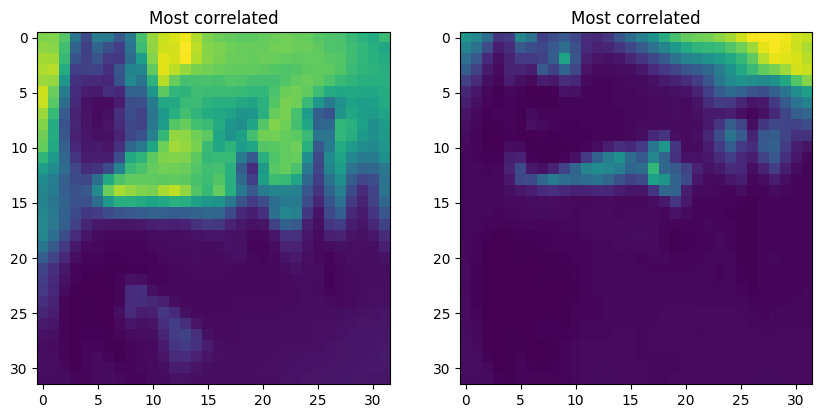

In [11]:
score_max=0
for j in range(10):
    for jj in range((j+1),9):
        if ( D[j,jj]>score_max ):
            score_max=D[j,jj]
            r_max=j
            c_max=jj
            
print(r_max)
print(c_max)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_max].reshape((32, 32)).T)
axes[0].set_title('Most correlated')
axes[1].imshow(X[:, c_max].reshape((32, 32)).T)
axes[1].set_title('Most correlated')
plt.show()

1
2


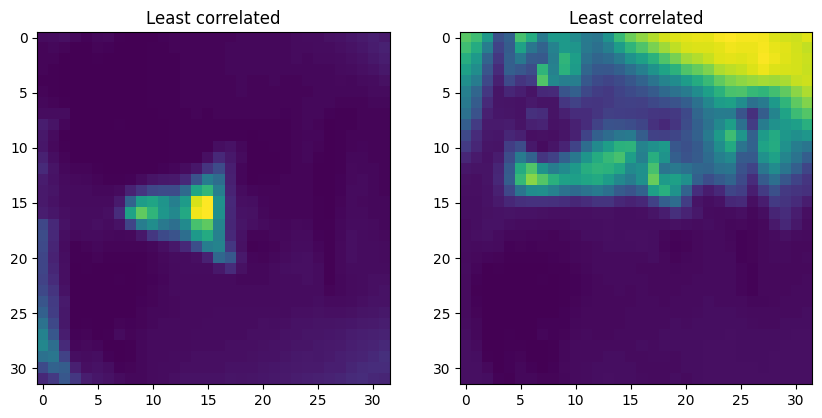

In [12]:
score_min = np.inf
for j in range(10):
    for jj in range((j+1), 9):
        if D[j, jj] < score_min:
            score_min = D[j, jj]
            r_min = j
            c_min = jj
            
print(r_min)
print(c_min)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(X[:, r_min].reshape((32, 32)).T)
axes[0].set_title('Least correlated')
axes[1].imshow(X[:, c_min].reshape((32, 32)).T)
axes[1].set_title('Least correlated')
plt.show()

In [55]:
# create Y = XX^T
Y = np.matmul(X, X.T)

# compute the eigenvalues and eigenvectors of Y
eigvals, eigvecs = np.linalg.eig(Y)

# find the indices that would sort the eigenvalues in decreasing order
idx = np.argsort(eigvals)[::-1]

# extract the first six eigenvectors with the largest magnitude eigenvalue
eigvecs_top6 = eigvecs[:, idx[:6]]

v1 = eigvecs_top6[:,0]

print(v1)

[0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]


In [25]:
# SVD decomposition of X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Compute the first six principal component directions
u1 = U[:, 0]
u2 = U[:, 1]
u3 = U[:, 2]
u4 = U[:, 3]
u5 = U[:, 4]
u6 = U[:, 5]


In [29]:
# compare v1 with u1 & compute norm of difference of their absolute values 
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))
print("Norm of difference between absolute values of v1 and u1 is : ", diff_norm)

Norm of difference between absolute values of v1 and u1 is :  1.7239180576197145e-15


Mode 1: 72.93%
Mode 2: 15.28%
Mode 3: 2.57%
Mode 4: 1.88%
Mode 5: 0.64%
Mode 6: 0.59%


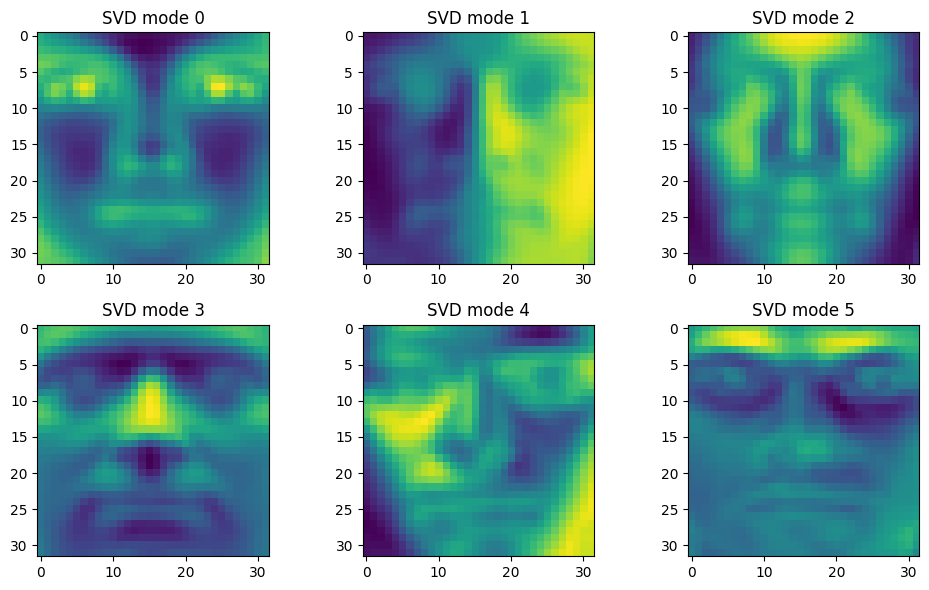

In [53]:
# Compute the percentage of variance captured by each mode
variance_percent = (S ** 2 / np.sum(S ** 2)) * 100

# Print the percentage of variance captured by each mode
for i in range(6):
    print("Mode {}: {:.2f}%".format(i+1, variance_percent[i]))


# Plot the first six SVD modes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i in np.arange(6):
    plt.subplot(2,3,i+1)
    plt.imshow(U[:,i].reshape(32,32))
    plt.title('SVD mode ' + str(i))

plt.tight_layout()
plt.show()
    